This notebook uses my implementation of a neural net to compare the performance of different optimization algorithms, namely:
- gradient descent (GD)
- GD with momentum
- RMSProp
- Adam

The network is required to perform binary classification.

In [3]:
import sklearn
import sklearn.datasets
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation

from neural_network import NeuralNetworkImpl
from utils import plot_decision_boundary, compute_accuracy

Using TensorFlow backend.


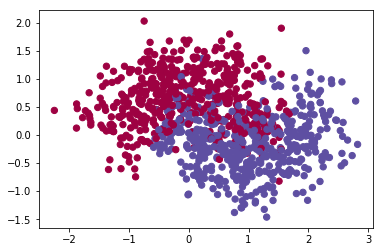

In [4]:
train_X, train_Y = sklearn.datasets.make_moons(n_samples=1000, noise=.4)
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
plt.show()
train_X = train_X.T
train_Y = train_Y.reshape((1, train_Y.shape[0]))

Parameters to train: 37
=== iteration 0, cost: 1.4393831166385411, accuracy: 0.5
=== iteration 10, cost: 0.9083737702014374, accuracy: 0.53125
=== iteration 20, cost: 0.6873859880839983, accuracy: 0.453125
=== iteration 30, cost: 0.5965464938928928, accuracy: 0.625
=== iteration 40, cost: 0.5496586486512001, accuracy: 0.765625
=== iteration 50, cost: 0.5239491249357613, accuracy: 0.828125
=== iteration 60, cost: 0.5119184000795318, accuracy: 0.8125
=== iteration 70, cost: 0.503399221539247, accuracy: 0.734375
=== iteration 80, cost: 0.4972085018142332, accuracy: 0.875
=== iteration 90, cost: 0.48941489424015844, accuracy: 0.8125
=== iteration 100, cost: 0.48741966694763084, accuracy: 0.84375
=== iteration 110, cost: 0.48573407943200164, accuracy: 0.90625
=== iteration 120, cost: 0.47824748835122355, accuracy: 0.8125
=== iteration 130, cost: 0.47546903556744907, accuracy: 0.796875
=== iteration 140, cost: 0.4759866246672335, accuracy: 0.796875
=== iteration 150, cost: 0.4700655992863571

=== iteration 1330, cost: 0.4121339943386475, accuracy: 0.796875
=== iteration 1340, cost: 0.40926797197175313, accuracy: 0.8125
=== iteration 1350, cost: 0.407902474402511, accuracy: 0.84375
=== iteration 1360, cost: 0.40788849444939346, accuracy: 0.859375
=== iteration 1370, cost: 0.40981964113654684, accuracy: 0.84375
=== iteration 1380, cost: 0.40763542163109784, accuracy: 0.859375
=== iteration 1390, cost: 0.4096631389689794, accuracy: 0.796875
=== iteration 1400, cost: 0.41137039167989253, accuracy: 0.859375
=== iteration 1410, cost: 0.41028133312317616, accuracy: 0.859375
=== iteration 1420, cost: 0.4073285571739208, accuracy: 0.8125
=== iteration 1430, cost: 0.40840334909222503, accuracy: 0.859375
=== iteration 1440, cost: 0.4099235357045331, accuracy: 0.890625
=== iteration 1450, cost: 0.40865112614404464, accuracy: 0.78125
=== iteration 1460, cost: 0.4098901936872812, accuracy: 0.859375
=== iteration 1470, cost: 0.40652128008405447, accuracy: 0.828125
=== iteration 1480, cost

=== iteration 2620, cost: 0.40042396168212485, accuracy: 0.90625
=== iteration 2630, cost: 0.40063550304299467, accuracy: 0.875
=== iteration 2640, cost: 0.40209346521196354, accuracy: 0.859375
=== iteration 2650, cost: 0.403020344799195, accuracy: 0.828125
=== iteration 2660, cost: 0.40274859826671505, accuracy: 0.84375
=== iteration 2670, cost: 0.4014072232670173, accuracy: 0.890625
=== iteration 2680, cost: 0.40019844752706446, accuracy: 0.84375
=== iteration 2690, cost: 0.399066161178875, accuracy: 0.859375
=== iteration 2700, cost: 0.3994346236193944, accuracy: 0.828125
=== iteration 2710, cost: 0.40398191926791993, accuracy: 0.8125
=== iteration 2720, cost: 0.3998705374952986, accuracy: 0.71875
=== iteration 2730, cost: 0.4016408100935872, accuracy: 0.859375
=== iteration 2740, cost: 0.3996222136158386, accuracy: 0.859375
=== iteration 2750, cost: 0.40352829181473615, accuracy: 0.8125
=== iteration 2760, cost: 0.4017465521336147, accuracy: 0.75
=== iteration 2770, cost: 0.4014514

=== iteration 3920, cost: 0.3871994172198228, accuracy: 0.890625
=== iteration 3930, cost: 0.3882237734710393, accuracy: 0.796875
=== iteration 3940, cost: 0.38596839515847814, accuracy: 0.859375
=== iteration 3950, cost: 0.3847510764409656, accuracy: 0.828125
=== iteration 3960, cost: 0.38274841597974724, accuracy: 0.84375
=== iteration 3970, cost: 0.3856914211646198, accuracy: 0.828125
=== iteration 3980, cost: 0.383297777729844, accuracy: 0.90625
=== iteration 3990, cost: 0.3861324826808738, accuracy: 0.796875
=== iteration 4000, cost: 0.38475163668712287, accuracy: 0.78125
=== iteration 4010, cost: 0.3848339729868486, accuracy: 0.828125
=== iteration 4020, cost: 0.38470285987600356, accuracy: 0.90625
=== iteration 4030, cost: 0.3827627357614086, accuracy: 0.875
=== iteration 4040, cost: 0.3862078535203141, accuracy: 0.8125
=== iteration 4050, cost: 0.386503858454951, accuracy: 0.859375
=== iteration 4060, cost: 0.3861487385002135, accuracy: 0.875
=== iteration 4070, cost: 0.3837386

=== iteration 5200, cost: 0.3759852261090653, accuracy: 0.90625
=== iteration 5210, cost: 0.3735105954321416, accuracy: 0.84375
=== iteration 5220, cost: 0.37307621084050796, accuracy: 0.8125
=== iteration 5230, cost: 0.37411621723637417, accuracy: 0.875
=== iteration 5240, cost: 0.37674385773353175, accuracy: 0.84375
=== iteration 5250, cost: 0.37403727797638453, accuracy: 0.859375
=== iteration 5260, cost: 0.37437760727101327, accuracy: 0.90625
=== iteration 5270, cost: 0.3771730952172783, accuracy: 0.78125
=== iteration 5280, cost: 0.3743613579701535, accuracy: 0.828125
=== iteration 5290, cost: 0.37508183783696364, accuracy: 0.84375
=== iteration 5300, cost: 0.3770658875757529, accuracy: 0.84375
=== iteration 5310, cost: 0.37403869549204877, accuracy: 0.828125
=== iteration 5320, cost: 0.3719435905400316, accuracy: 0.875
=== iteration 5330, cost: 0.37274137090804843, accuracy: 0.78125
=== iteration 5340, cost: 0.37502033119074996, accuracy: 0.875
=== iteration 5350, cost: 0.3782103

=== iteration 6490, cost: 0.3682320879236895, accuracy: 0.78125
=== iteration 6500, cost: 0.3694578916875464, accuracy: 0.875
=== iteration 6510, cost: 0.3689154043021957, accuracy: 0.859375
=== iteration 6520, cost: 0.36622907276751654, accuracy: 0.8125
=== iteration 6530, cost: 0.36820641493005807, accuracy: 0.796875
=== iteration 6540, cost: 0.3653078561419145, accuracy: 0.875
=== iteration 6550, cost: 0.3692198843092894, accuracy: 0.796875
=== iteration 6560, cost: 0.3673995131200789, accuracy: 0.859375
=== iteration 6570, cost: 0.3691168276244178, accuracy: 0.875
=== iteration 6580, cost: 0.3660528394430055, accuracy: 0.765625
=== iteration 6590, cost: 0.36994933223681103, accuracy: 0.8125
=== iteration 6600, cost: 0.36632461175002307, accuracy: 0.875
=== iteration 6610, cost: 0.36743281264476796, accuracy: 0.828125
=== iteration 6620, cost: 0.36694969145932077, accuracy: 0.875
=== iteration 6630, cost: 0.3716207497186739, accuracy: 0.890625
=== iteration 6640, cost: 0.36815238422

=== iteration 7770, cost: 0.3628055409064814, accuracy: 0.84375
=== iteration 7780, cost: 0.36196576585590423, accuracy: 0.859375
=== iteration 7790, cost: 0.36129356580279015, accuracy: 0.875
=== iteration 7800, cost: 0.36163743693195805, accuracy: 0.84375
=== iteration 7810, cost: 0.3601005799215007, accuracy: 0.828125
=== iteration 7820, cost: 0.35923010025984214, accuracy: 0.875
=== iteration 7830, cost: 0.36076692124979454, accuracy: 0.828125
=== iteration 7840, cost: 0.3638519720088396, accuracy: 0.828125
=== iteration 7850, cost: 0.3617306329732024, accuracy: 0.8125
=== iteration 7860, cost: 0.36329135236007026, accuracy: 0.875
=== iteration 7870, cost: 0.36089072747471573, accuracy: 0.90625
=== iteration 7880, cost: 0.3600300327445598, accuracy: 0.84375
=== iteration 7890, cost: 0.36434436736386455, accuracy: 0.8125
=== iteration 7900, cost: 0.3608513671533857, accuracy: 0.875
=== iteration 7910, cost: 0.3633410820677072, accuracy: 0.8125
=== iteration 7920, cost: 0.36142704992

=== iteration 9060, cost: 0.3574980607547015, accuracy: 0.828125
=== iteration 9070, cost: 0.35949051583740077, accuracy: 0.84375
=== iteration 9080, cost: 0.35530731225001033, accuracy: 0.8125
=== iteration 9090, cost: 0.3588468600317565, accuracy: 0.921875
=== iteration 9100, cost: 0.3605249282086394, accuracy: 0.875
=== iteration 9110, cost: 0.35570926059416513, accuracy: 0.78125
=== iteration 9120, cost: 0.3571113170222666, accuracy: 0.828125
=== iteration 9130, cost: 0.3582485757083469, accuracy: 0.765625
=== iteration 9140, cost: 0.3558899317216613, accuracy: 0.765625
=== iteration 9150, cost: 0.35645402004107857, accuracy: 0.890625
=== iteration 9160, cost: 0.35787704789877667, accuracy: 0.859375
=== iteration 9170, cost: 0.3547268186478698, accuracy: 0.90625
=== iteration 9180, cost: 0.3585540362160939, accuracy: 0.890625
=== iteration 9190, cost: 0.3563689202963095, accuracy: 0.875
=== iteration 9200, cost: 0.3605789772282373, accuracy: 0.78125
=== iteration 9210, cost: 0.3596

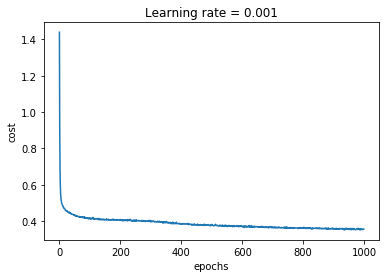

Neural net (sgd) model train accuracy: 0.8420000000000003


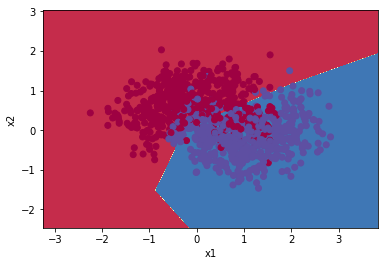

In [5]:
model_nn_sgd = NeuralNetworkImpl(layer_sizes=[5, 3, 1],
    layer_activations=['relu', 'relu', 'sigmoid'], alpha=0.001,
    epochs=10000, optimization_algorithm='sgd')
model_nn_sgd.train(train_X, train_Y)

accuracy = compute_accuracy(model_nn_sgd, train_X, train_Y)
print("Neural net (sgd) model train accuracy: {}".format(accuracy))
plot_decision_boundary(model_nn_sgd, train_X, train_Y)

=== iteration 0, cost: 1.2162503663135766, accuracy: 0.5625
=== iteration 1000, cost: 0.33750567949396715, accuracy: 0.859375
=== iteration 2000, cost: 0.3043807689677153, accuracy: 0.875
=== iteration 3000, cost: 0.3283309505065512, accuracy: 0.859375
=== iteration 4000, cost: 0.35922307018833005, accuracy: 0.859375
=== iteration 5000, cost: 0.37058402494678505, accuracy: 0.890625
=== iteration 6000, cost: 0.3080489487265856, accuracy: 0.90625
=== iteration 7000, cost: 0.39969824229406664, accuracy: 0.828125
=== iteration 8000, cost: 0.45000208242940226, accuracy: 0.78125
=== iteration 9000, cost: 0.30014233813375346, accuracy: 0.859375


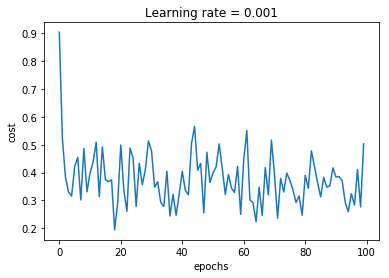

Neural net (momentum) model train accuracy: 0.8620000000000003


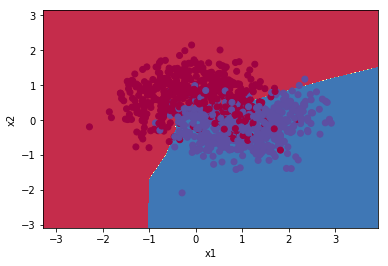

In [11]:
model_nn_mom = NeuralNetworkImpl(layer_sizes=[5, 3, 1],
    layer_activations=['relu', 'relu', 'sigmoid'], alpha=0.001,
    epochs=10000, mini_batch_size=64, optimization_algorithm='momentum')
model_nn_mom.train(train_X, train_Y)

accuracy = compute_accuracy(model_nn_mom, train_X, train_Y)
print("Neural net (momentum) model train accuracy: {}".format(accuracy))
plot_decision_boundary(model_nn_mom, train_X, train_Y)

=== iteration 0, cost: 1.2162503663135766, accuracy: 0.5625
=== iteration 1000, cost: 0.25408785204626333, accuracy: 0.890625
=== iteration 2000, cost: 0.2628591787372659, accuracy: 0.90625
=== iteration 3000, cost: 0.21712561451578388, accuracy: 0.921875
=== iteration 4000, cost: 0.2893028893630178, accuracy: 0.859375
=== iteration 5000, cost: 0.3003167790621004, accuracy: 0.890625
=== iteration 6000, cost: 0.21788447560580135, accuracy: 0.953125
=== iteration 7000, cost: 0.3130555982579666, accuracy: 0.84375
=== iteration 8000, cost: 0.41464503989961493, accuracy: 0.828125
=== iteration 9000, cost: 0.31873264678472624, accuracy: 0.875


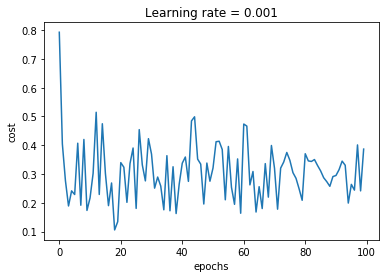

Neural net (rmsprop) model train accuracy: 0.8800000000000003


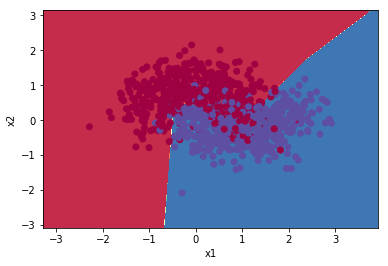

In [12]:
model_nn_rmsprop = NeuralNetworkImpl(layer_sizes=[5, 3, 1],
    layer_activations=['relu', 'relu', 'sigmoid'], alpha=0.001,
    epochs=10000, mini_batch_size=64, optimization_algorithm='rmsprop')
model_nn_rmsprop.train(train_X, train_Y)

accuracy = compute_accuracy(model_nn_rmsprop, train_X, train_Y)
print("Neural net (rmsprop) model train accuracy: {}".format(accuracy))
plot_decision_boundary(model_nn_rmsprop, train_X, train_Y)

Parameters to train: 37
=== iteration 0, cost: 1.4053196931163985, accuracy: 0.5
=== iteration 10, cost: 0.6084992777577702, accuracy: 0.625
=== iteration 20, cost: 0.49316718354962846, accuracy: 0.8125
=== iteration 30, cost: 0.4743010309031762, accuracy: 0.859375
=== iteration 40, cost: 0.46183205553787854, accuracy: 0.859375
=== iteration 50, cost: 0.4530006036117175, accuracy: 0.828125
=== iteration 60, cost: 0.4434257306894511, accuracy: 0.828125
=== iteration 70, cost: 0.43594382044463464, accuracy: 0.75
=== iteration 80, cost: 0.42897237071539396, accuracy: 0.875
=== iteration 90, cost: 0.42178723101437304, accuracy: 0.84375
=== iteration 100, cost: 0.4200510041398407, accuracy: 0.859375
=== iteration 110, cost: 0.4171099687777492, accuracy: 0.9375
=== iteration 120, cost: 0.41069422909649045, accuracy: 0.8125
=== iteration 130, cost: 0.40936179065112305, accuracy: 0.8125
=== iteration 140, cost: 0.408792261669376, accuracy: 0.8125
=== iteration 150, cost: 0.4039778363557236, ac

=== iteration 1290, cost: 0.2890185193377424, accuracy: 0.890625
=== iteration 1300, cost: 0.2901306760631124, accuracy: 0.8125
=== iteration 1310, cost: 0.29414018781527784, accuracy: 0.828125
=== iteration 1320, cost: 0.2896208322950109, accuracy: 0.828125
=== iteration 1330, cost: 0.2940451117089373, accuracy: 0.875
=== iteration 1340, cost: 0.2904860959537232, accuracy: 0.859375
=== iteration 1350, cost: 0.2889356224304572, accuracy: 0.90625
=== iteration 1360, cost: 0.29036696524111955, accuracy: 0.90625
=== iteration 1370, cost: 0.29100671052421756, accuracy: 0.90625
=== iteration 1380, cost: 0.28977446019339365, accuracy: 0.875
=== iteration 1390, cost: 0.290918807339224, accuracy: 0.84375
=== iteration 1400, cost: 0.29219100422752986, accuracy: 0.90625
=== iteration 1410, cost: 0.289981659767631, accuracy: 0.796875
=== iteration 1420, cost: 0.29009537239472083, accuracy: 0.828125
=== iteration 1430, cost: 0.29091937962123493, accuracy: 0.875
=== iteration 1440, cost: 0.28996469

=== iteration 2570, cost: 0.28997731310055136, accuracy: 0.84375
=== iteration 2580, cost: 0.28861653062862924, accuracy: 0.84375
=== iteration 2590, cost: 0.29027913979427067, accuracy: 0.921875
=== iteration 2600, cost: 0.2896837277531139, accuracy: 0.890625
=== iteration 2610, cost: 0.2920135342156775, accuracy: 0.828125
=== iteration 2620, cost: 0.2884352600595146, accuracy: 0.90625
=== iteration 2630, cost: 0.2884860196529082, accuracy: 0.859375
=== iteration 2640, cost: 0.28891507745526496, accuracy: 0.90625
=== iteration 2650, cost: 0.29141977622158, accuracy: 0.828125
=== iteration 2660, cost: 0.28819422672056166, accuracy: 0.84375
=== iteration 2670, cost: 0.2900768769383074, accuracy: 0.921875
=== iteration 2680, cost: 0.28832713878053906, accuracy: 0.875
=== iteration 2690, cost: 0.28859805686408657, accuracy: 0.828125
=== iteration 2700, cost: 0.2887815991355458, accuracy: 0.875
=== iteration 2710, cost: 0.2936934880072698, accuracy: 0.75
=== iteration 2720, cost: 0.2893351

=== iteration 3870, cost: 0.2887806637052188, accuracy: 0.890625
=== iteration 3880, cost: 0.2891385904349366, accuracy: 0.921875
=== iteration 3890, cost: 0.288103746101541, accuracy: 0.859375
=== iteration 3900, cost: 0.2872177559207785, accuracy: 0.953125
=== iteration 3910, cost: 0.28929770208072253, accuracy: 0.9375
=== iteration 3920, cost: 0.2884385784756926, accuracy: 0.90625
=== iteration 3930, cost: 0.29083194393996825, accuracy: 0.859375
=== iteration 3940, cost: 0.2900007806964434, accuracy: 0.90625
=== iteration 3950, cost: 0.2873192604290884, accuracy: 0.90625
=== iteration 3960, cost: 0.2864171600408281, accuracy: 0.90625
=== iteration 3970, cost: 0.28927543171204106, accuracy: 0.8125
=== iteration 3980, cost: 0.28528679791365275, accuracy: 0.921875
=== iteration 3990, cost: 0.28940763489300286, accuracy: 0.90625
=== iteration 4000, cost: 0.2884932743126788, accuracy: 0.8125
=== iteration 4010, cost: 0.28805284344765436, accuracy: 0.84375
=== iteration 4020, cost: 0.2911

=== iteration 5150, cost: 0.2885757332396467, accuracy: 0.90625
=== iteration 5160, cost: 0.28746727037206754, accuracy: 0.90625
=== iteration 5170, cost: 0.2882221491623238, accuracy: 0.875
=== iteration 5180, cost: 0.28860602631430704, accuracy: 0.828125
=== iteration 5190, cost: 0.2879884492049466, accuracy: 0.890625
=== iteration 5200, cost: 0.2874713446168415, accuracy: 0.875
=== iteration 5210, cost: 0.2882788831523636, accuracy: 0.90625
=== iteration 5220, cost: 0.2861106786285962, accuracy: 0.828125
=== iteration 5230, cost: 0.2893801770746134, accuracy: 0.875
=== iteration 5240, cost: 0.28875684240173427, accuracy: 0.921875
=== iteration 5250, cost: 0.28739617771554193, accuracy: 0.921875
=== iteration 5260, cost: 0.287337148211208, accuracy: 0.890625
=== iteration 5270, cost: 0.29239417852406285, accuracy: 0.859375
=== iteration 5280, cost: 0.2869461857956995, accuracy: 0.8125
=== iteration 5290, cost: 0.2895859462898932, accuracy: 0.859375
=== iteration 5300, cost: 0.2913577

=== iteration 6430, cost: 0.2901655945191059, accuracy: 0.90625
=== iteration 6440, cost: 0.2885511815707871, accuracy: 0.828125
=== iteration 6450, cost: 0.2902865462360077, accuracy: 0.875
=== iteration 6460, cost: 0.28983138264361763, accuracy: 0.78125
=== iteration 6470, cost: 0.2890786928605805, accuracy: 0.828125
=== iteration 6480, cost: 0.2872443335956959, accuracy: 0.84375
=== iteration 6490, cost: 0.28820761001994355, accuracy: 0.875
=== iteration 6500, cost: 0.2893960839110368, accuracy: 0.921875
=== iteration 6510, cost: 0.2887883753293554, accuracy: 0.90625
=== iteration 6520, cost: 0.2873973961640066, accuracy: 0.84375
=== iteration 6530, cost: 0.2892515644085157, accuracy: 0.8125
=== iteration 6540, cost: 0.28390985144193276, accuracy: 0.875
=== iteration 6550, cost: 0.28881249545073684, accuracy: 0.765625
=== iteration 6560, cost: 0.28950220370733887, accuracy: 0.859375
=== iteration 6570, cost: 0.29057294813865825, accuracy: 0.828125
=== iteration 6580, cost: 0.2859718

=== iteration 7730, cost: 0.2880971909633419, accuracy: 0.875
=== iteration 7740, cost: 0.29016406795345007, accuracy: 0.90625
=== iteration 7750, cost: 0.2888519025534301, accuracy: 0.8125
=== iteration 7760, cost: 0.2900743903178683, accuracy: 0.859375
=== iteration 7770, cost: 0.28692284531674467, accuracy: 0.953125
=== iteration 7780, cost: 0.29012294255294047, accuracy: 0.828125
=== iteration 7790, cost: 0.28696812423546375, accuracy: 0.90625
=== iteration 7800, cost: 0.2869587442473782, accuracy: 0.84375
=== iteration 7810, cost: 0.2854853877674072, accuracy: 0.859375
=== iteration 7820, cost: 0.28540923843331434, accuracy: 0.875
=== iteration 7830, cost: 0.28839774675990204, accuracy: 0.859375
=== iteration 7840, cost: 0.2908503796415055, accuracy: 0.796875
=== iteration 7850, cost: 0.2890472593261495, accuracy: 0.859375
=== iteration 7860, cost: 0.2885847138437446, accuracy: 0.90625
=== iteration 7870, cost: 0.28695589559296875, accuracy: 0.90625
=== iteration 7880, cost: 0.286

=== iteration 9000, cost: 0.28537600895243165, accuracy: 0.84375
=== iteration 9010, cost: 0.28641662997503803, accuracy: 0.828125
=== iteration 9020, cost: 0.28818426593902324, accuracy: 0.8125
=== iteration 9030, cost: 0.28890020901627667, accuracy: 0.78125
=== iteration 9040, cost: 0.2896935949974412, accuracy: 0.765625
=== iteration 9050, cost: 0.28763329617681443, accuracy: 0.90625
=== iteration 9060, cost: 0.286679712461857, accuracy: 0.859375
=== iteration 9070, cost: 0.29064605854863784, accuracy: 0.90625
=== iteration 9080, cost: 0.2850838040510796, accuracy: 0.859375
=== iteration 9090, cost: 0.2880314518444539, accuracy: 0.921875
=== iteration 9100, cost: 0.28894033639914707, accuracy: 0.921875
=== iteration 9110, cost: 0.28747368906798954, accuracy: 0.84375
=== iteration 9120, cost: 0.2877638227213725, accuracy: 0.890625
=== iteration 9130, cost: 0.288314479732521, accuracy: 0.796875
=== iteration 9140, cost: 0.28736984681127276, accuracy: 0.796875
=== iteration 9150, cost:

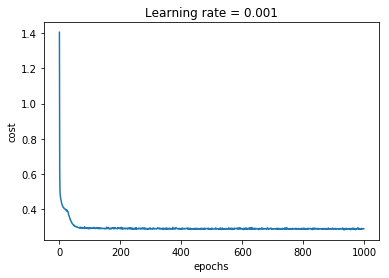

Neural net (adam) model train accuracy: 0.8650000000000003


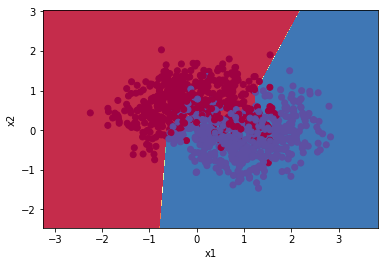

In [6]:
model_nn_adam = NeuralNetworkImpl(layer_sizes=[5, 3, 1],
    layer_activations=['relu', 'relu', 'sigmoid'], alpha=0.001,
    epochs=10000, mini_batch_size=64, optimization_algorithm='adam')
model_nn_adam.train(train_X, train_Y)

accuracy = compute_accuracy(model_nn_adam, train_X, train_Y)
print("Neural net (adam) model train accuracy: {}".format(accuracy))
plot_decision_boundary(model_nn_adam, train_X, train_Y)

In [14]:
# Compare the results with a Keras model using Adam
model = Sequential()
model.add(Dense(5, input_dim=2))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(train_X.T, np.squeeze(train_Y), epochs=10000, batch_size=64, verbose=0)
score = model.evaluate(train_X.T, np.squeeze(train_Y), batch_size=64)
print("\nKeras NN loss/accuracy:")
for label, value in zip(model.metrics_names, score):
    print("{}: {}".format(label, value))

  64/1000 [>.............................] - ETA: 0s
Keras NN loss/accuracy:
loss: 0.30106549882888795
acc: 0.8740000009536744
